# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define a function to get weather data for each city
def get_weather_data(city):
    try:
        # Create the endpoint URL with each city
        city_url = url + "appid=" + weather_api_key + "&q=" + city

        # Make the request to the OpenWeatherMap API to get weather data
        response = requests.get(city_url)
        response_json = response.json()

        # Parse the JSON and extract relevant data
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']
        # Return a dictionary with the weather data
        return {
            'City': city,
            'Lat': city_lat,
            'Lng': city_lng,
            'Max Temp': city_max_temp,
            'Humidity': city_humidity,
            'Cloudiness': city_clouds,
            'Wind Speed': city_wind,
            'Country': city_country,
            'Date': city_date
        }
    except Exception as e:
        # If there's an error in the request or JSON parsing, return None
        print(f"Error getting weather data for city {city}: {e}")
        return None
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment record count
    record_count += 1

 # Get weather data for the current city using the get_weather_data function
    city_weather_data = get_weather_data(city)

    # If valid data is obtained, add the dictionary to city_data list
    if city_weather_data is not None:
        city_data.append(city_weather_data)

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | taroa
Processing Record 5 of Set 1 | tingo maria
Processing Record 6 of Set 1 | amos
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ciudad bolivar
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | miracema do tocantins
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | dryden
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | hailar
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | 'ohonua
Err

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,285.48,100,100,1.00,RU,1689896652
1,papatowai,-46.5619,169.4708,280.05,64,10,5.08,NZ,1689896754
2,albany,42.6001,-73.9662,299.02,65,48,1.29,US,1689896523
3,taroa,8.7058,171.2275,301.42,81,83,9.28,MH,1689896756
4,tingo maria,-9.2895,-76.0088,295.40,92,90,1.56,PE,1689896756


In [18]:
# Export the City_Data into a csv
# Crear la carpeta 
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,285.48,100,100,1.00,RU,1689896652
1,papatowai,-46.5619,169.4708,280.05,64,10,5.08,NZ,1689896754
2,albany,42.6001,-73.9662,299.02,65,48,1.29,US,1689896523
3,taroa,8.7058,171.2275,301.42,81,83,9.28,MH,1689896756
4,tingo maria,-9.2895,-76.0088,295.40,92,90,1.56,PE,1689896756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

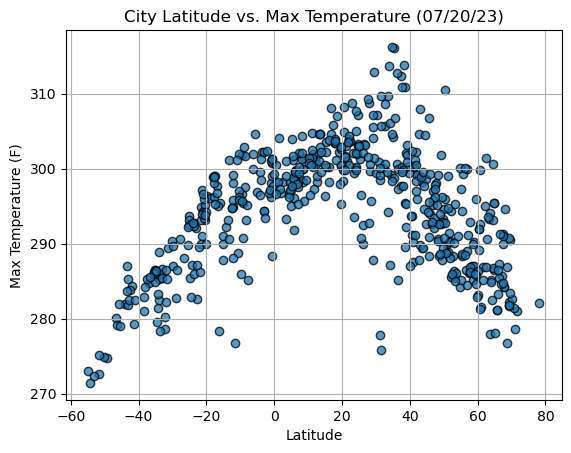

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

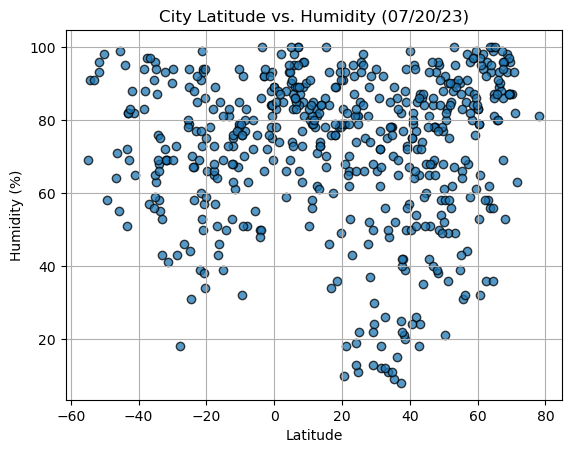

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

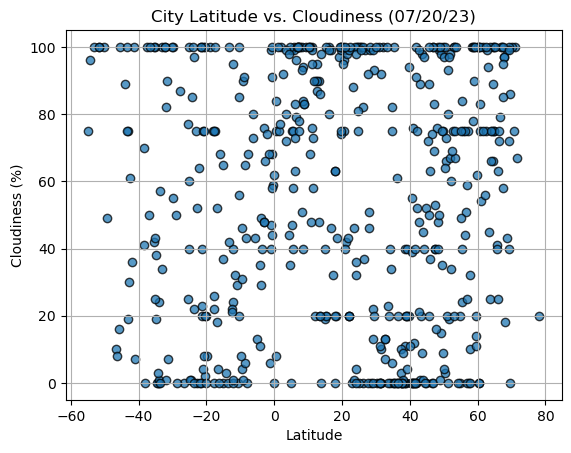

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

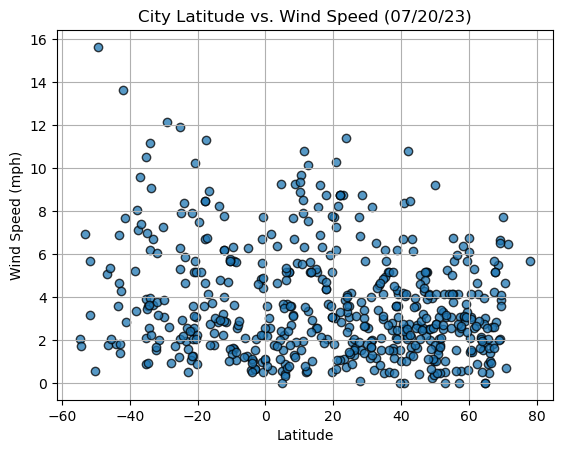

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create equation of line to display on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Show the plot
    plt.show()
    
    # Save the figure
    plt.savefig(f"output_data/{title}.png")

  



In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,285.48,100,100,1.00,RU,1689896652
2,albany,42.6001,-73.9662,299.02,65,48,1.29,US,1689896523
3,taroa,8.7058,171.2275,301.42,81,83,9.28,MH,1689896756
5,amos,48.5669,-78.1162,288.37,95,99,2.02,CA,1689896757
6,stanley,54.8680,-1.6985,284.16,90,0,2.57,GB,1689896758


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,280.05,64,10,5.08,NZ,1689896754
4,tingo maria,-9.2895,-76.0088,295.40,92,90,1.56,PE,1689896756
7,avarua,-21.2078,-159.7750,297.18,53,20,3.60,CK,1689896758
8,margaret river,-33.9500,115.0667,288.83,68,24,11.15,AU,1689896759
9,adamstown,-25.0660,-130.1015,293.66,89,100,11.93,PN,1689896580


###  Temperature vs. Latitude Linear Regression Plot

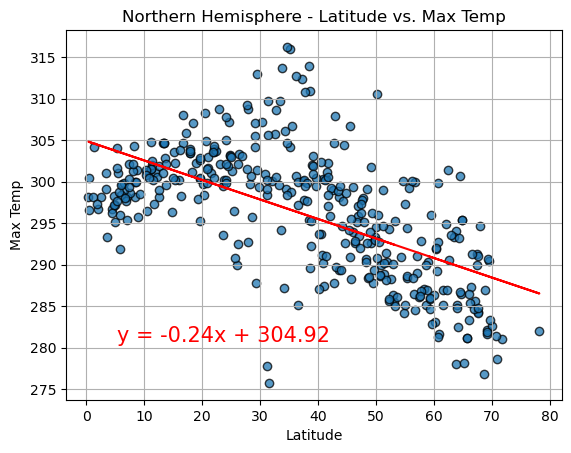

In [33]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create equation of line to display on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(f"output_data/{title}.png")

    # Show the plot
    plt.show()

# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values_north, y_values_north, "Northern Hemisphere - Latitude vs. Max Temp", "Latitude", "Max Temp")


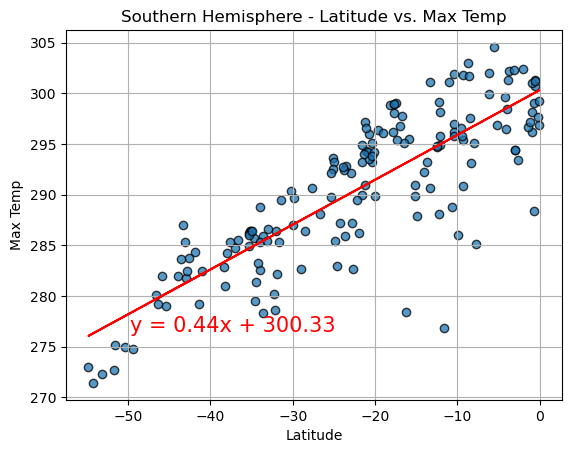

In [34]:

# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values_south, y_values_south, "Southern Hemisphere - Latitude vs. Max Temp", "Latitude", "Max Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Regression 1: There is a moderate negative relationship between x and y, where x is the independent variable, and y is the dependent variable. Each one-unit increase in x is associated with a 0.24 unit decrease in y. Additionally, the initial value of y is 304.92 when x is equal to zero.

Regression 2: There is a moderate positive relationship between x and y, where x is the independent variable, and y is the dependent variable. Each one-unit increase in x is associated with a 0.44 unit increase in y. Additionally, the initial value of y is 300.33 when x is equal to zero.


### Humidity vs. Latitude Linear Regression Plot

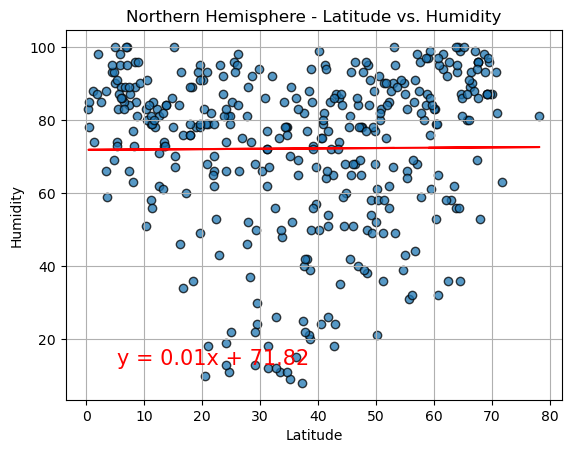

In [35]:
# Northern Hemisphere
# Northern Hemisphere create humidity vs latituted linear regression plot
x_values_north_humidity = northern_hemi_df["Lat"]
y_values_north_humidity = northern_hemi_df["Humidity"]

plot_linear_regression(x_values_north_humidity, y_values_north_humidity, "Northern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity")


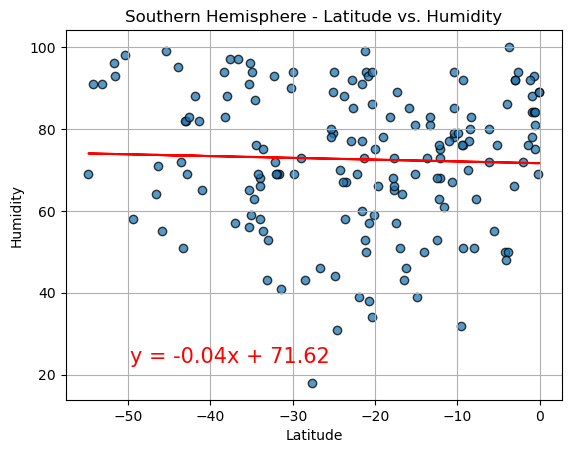

In [36]:
# Southern Hemisphere
# Southern Hemisphere create humidity vs latituted linear regression plot
x_values_south_humidity = southern_hemi_df["Lat"]
y_values_south_humidity = southern_hemi_df["Humidity"]

plot_linear_regression(x_values_south_humidity, y_values_south_humidity, "Southern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both regression equations represent linear relationships between x and y. In regression 1, the relationship is positive, while in regression 2, the relationship is negative. The slopes of the regression lines indicate the rate of change in y with respect to x.





### Cloudiness vs. Latitude Linear Regression Plot

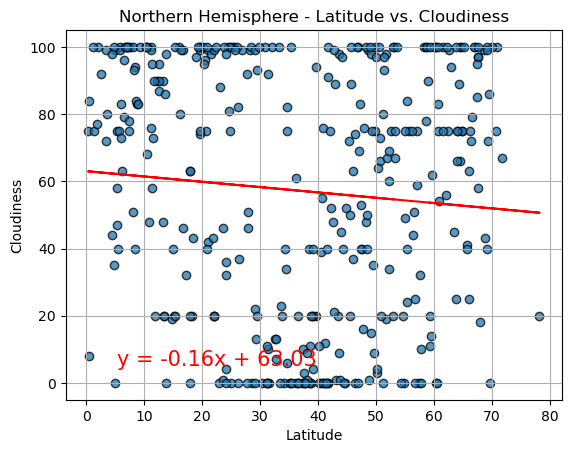

In [37]:
# Northern Hemisphere
# Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere
x_values_north_cloudiness = northern_hemi_df["Lat"]
y_values_north_cloudiness = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values_north_cloudiness, y_values_north_cloudiness, "Northern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness")


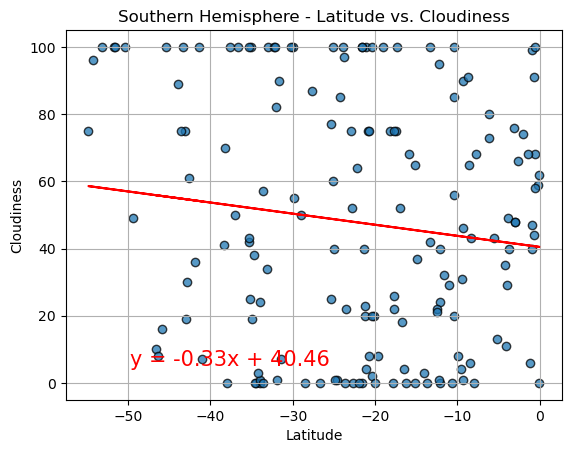

In [38]:
# Southern Hemisphere
# Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere
x_values_south_cloudiness = southern_hemi_df["Lat"]
y_values_south_cloudiness = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values_south_cloudiness, y_values_south_cloudiness, "Southern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both regressions show a negative relationship between x and y, meaning that an increase in x is associated with a decrease in y.
Regression 2 appears to have a steeper slope than Regression 1, suggesting a stronger relationship between the variables.
The R-squared values (not provided) would be essential to assess the goodness of fit for these regression models. Higher R-squared values indicate better fits and more reliable predictions.

### Wind Speed vs. Latitude Linear Regression Plot

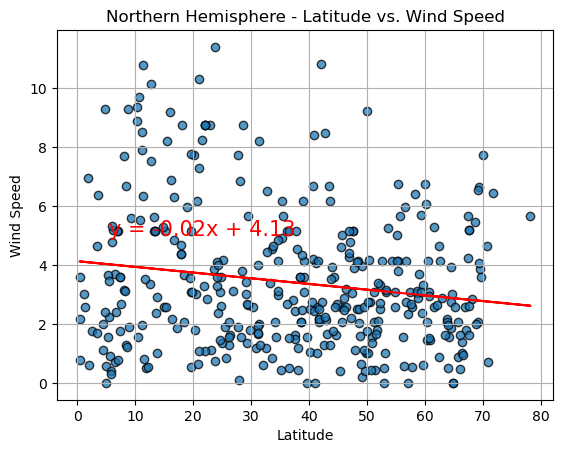

In [39]:
# Northern Hemisphere
# Wind Speed vs. Latitude Linear Regression Plot Northern Hemisphere
x_values_north_wind = northern_hemi_df["Lat"]
y_values_north_wind = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values_north_wind, y_values_north_wind, "Northern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed")


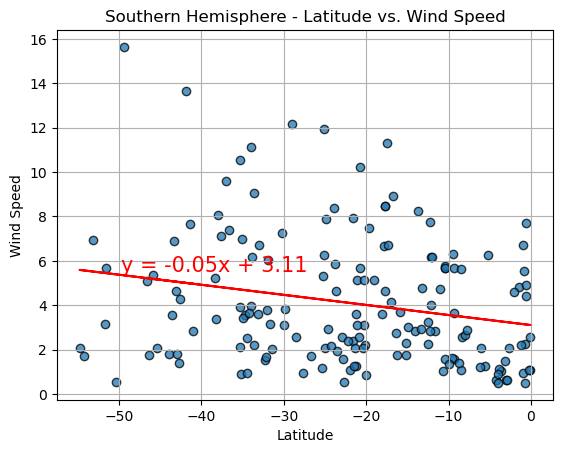

In [40]:
# Southern Hemisphere
# Wind Speed vs. Latitude Linear Regression Plot Southern Hemisphere
x_values_south_wind = southern_hemi_df["Lat"]
y_values_south_wind = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values_south_wind, y_values_south_wind, "Southern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both regressions show relatively weak relationships between x and y, given the small slope coefficients.
Regression 1 has a higher y-intercept (41.13), indicating that when x is equal to 0, the value of y is relatively higher compared to Regression 2, which has a lower y-intercept (3.11).